<a href="https://colab.research.google.com/github/szh141/QI-2024/blob/main/Day2_quantitative_microscopy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


diatom 硅藻

https://en.wikipedia.org/wiki/Diatom

http://www.microscopy-uk.org.uk/mag/indexmag.html?http://www.microscopy-uk.org.uk/mag/artapr09/rvw-contrast.html

https://jmcscientificconsulting.com/microscopy-the-beauty-of-diatoms/

16 dots/um

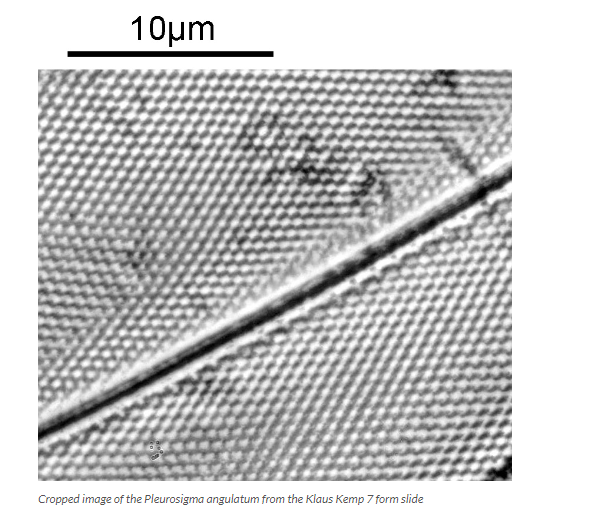

BW PSF from Fiji

Width:  25600 nm (256)
Height:  25600 nm (256)
Depth:  16250 nm (65)
BW PSF: 520nm NA 1.4
the meaasured FWHM of gaussian fit is ~230nm
pixelated central peak

Width:  2560 nm (256)
Height:  2560 nm (256)
Depth:  1625 nm (65)
the measured FWHM of gaussian fit is ~ 180nm
smooth central peak, but z is not enough


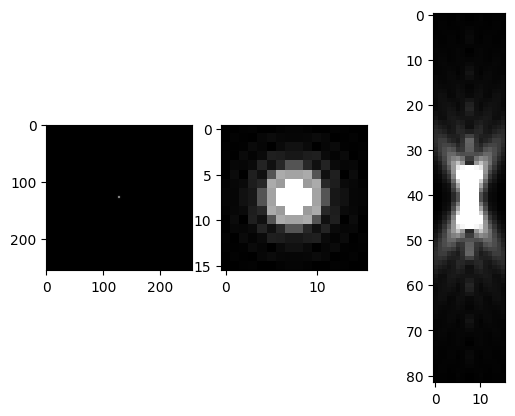

(<Axes: >, <matplotlib.image.AxesImage at 0x7d648dcae350>)

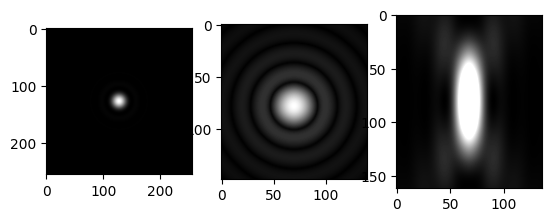

In [1]:
from skimage import io, exposure
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt

img1 = io.imread('/content/drive/MyDrive/Colab images/psf.tif')
img1_resized = resize(
    img1, (65*2.5, 256,256)
)
plt.subplot(131), plt.imshow(img1_resized[81],cmap='gray')
plt.subplot(132), plt.imshow(img1_resized[81,120:136,120:136],cmap='gray',vmax=0.05)
plt.subplot(133), plt.imshow(img1_resized[40:122,128,120:136],cmap='gray',vmax=0.1)
plt.show()

img2 = io.imread('/content/drive/MyDrive/Colab images/PSF BW 10nm.tif')
img2_resized = resize(
    img2, (65*2.5, 256,256)
)

img2_gamma = exposure.adjust_gamma(img2_resized,0.4)

plt.subplot(131), plt.imshow(img2_resized[81],cmap='gray')
plt.subplot(132), plt.imshow(exposure.adjust_gamma(img2_resized[81,50:198,58:198],0.4),cmap='gray')
plt.subplot(133), plt.imshow(img2_resized[:,128,60:196],cmap='gray',vmax=0.5)

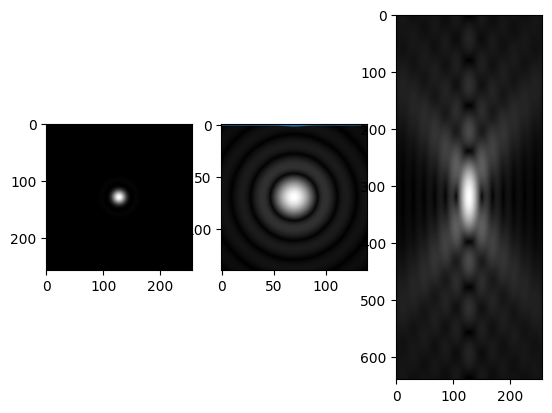

In [2]:
img3 = io.imread('/content/drive/MyDrive/Colab images/psf 10nm 25nm 256z.tif')

img3_resized = resize(
    img3, (256*2.5, 256,256)
)

plt.subplot(131), plt.imshow(img3_resized[320],cmap='gray')
plt.subplot(132), plt.imshow(exposure.adjust_gamma(img3_resized[320,58:198,58:198],0.4),cmap='gray'),plt.plot(np.arange(140),img3_resized[320,128,58:198])
plt.subplot(133), plt.imshow(exposure.adjust_gamma(img3_resized[:,128,],0.4),cmap='gray')
plt.show()

Above, pay attention to the relative scale of latreal vs axial PSF. Axial is almost 3x larger than lateral.

On a real sample below, orthogonal view of a <200nm particle gives good idea of psf. But lateral view of small points, won't give good idea of psf w/o gamma adjustment, and it's too small.

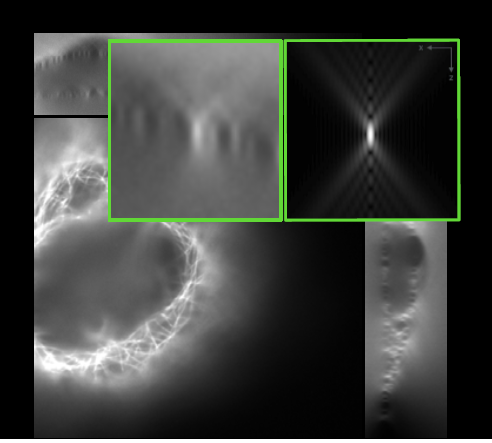

spherical aberration increases with depth

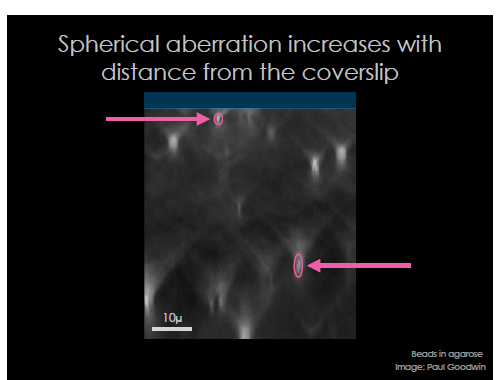

(<Axes: >, [<matplotlib.lines.Line2D at 0x7d6478ab2170>])

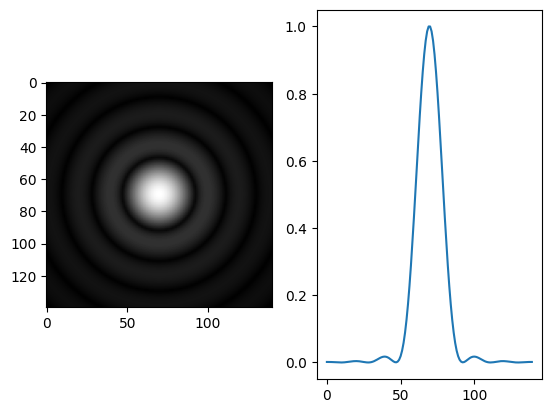

In [3]:
plt.subplot(121),plt.imshow(exposure.adjust_gamma(img3_resized[320,58:198,58:198],0.4),cmap='gray')
plt.subplot(122),plt.plot(np.arange(140),img3_resized[320,128,58:198])

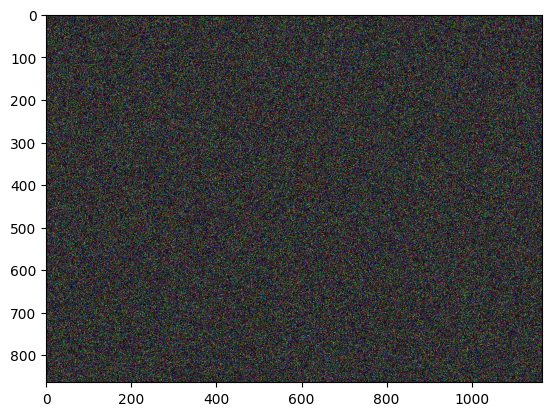

In [41]:
plt.imshow(noise)

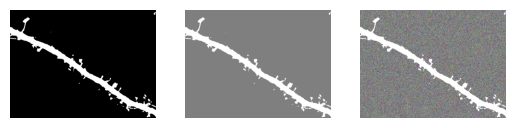

(<Axes: >,
 (-0.5, 1165.5, 863.5, -0.5))

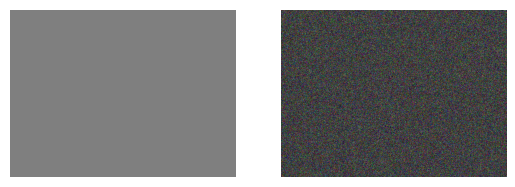

In [55]:
dendrite = io.imread('/content/drive/MyDrive/Colab images/QI 2024/dendrite.tif')
mask = dendrite>150
masked = mask*dendrite
bg = np.ones((dendrite.shape))*0.5
noise = np.random.normal(0,0.7,bg.shape)

plt.subplot(131),plt.imshow(masked*0.1,cmap='gray'),plt.axis('off')
plt.subplot(132),plt.imshow(masked*0.1 + bg),plt.axis('off')
plt.subplot(133),plt.imshow(masked*0.1 + bg + noise, cmap='gray'),plt.axis('off')
plt.show()

plt.subplot(121),plt.imshow(bg,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(noise,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-58.25, 1223.25, -3.096218146320813, 26.11912358107234))

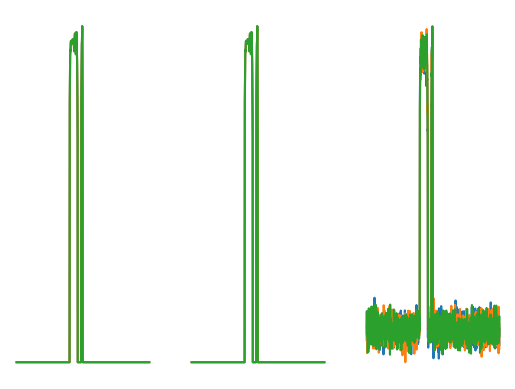

In [52]:
a1 = masked*0.1 + bg
a2 = masked*0.1 + bg + noise
plt.subplot(131),plt.plot(range(masked.shape[1]),masked[masked.shape[0]//2]*0.1),plt.axis('off')
plt.subplot(132),plt.plot(range(masked.shape[1]),a1[masked.shape[0]//2]),plt.axis('off')
plt.subplot(133),plt.plot(range(masked.shape[1]),a2[masked.shape[0]//2]),plt.axis('off')

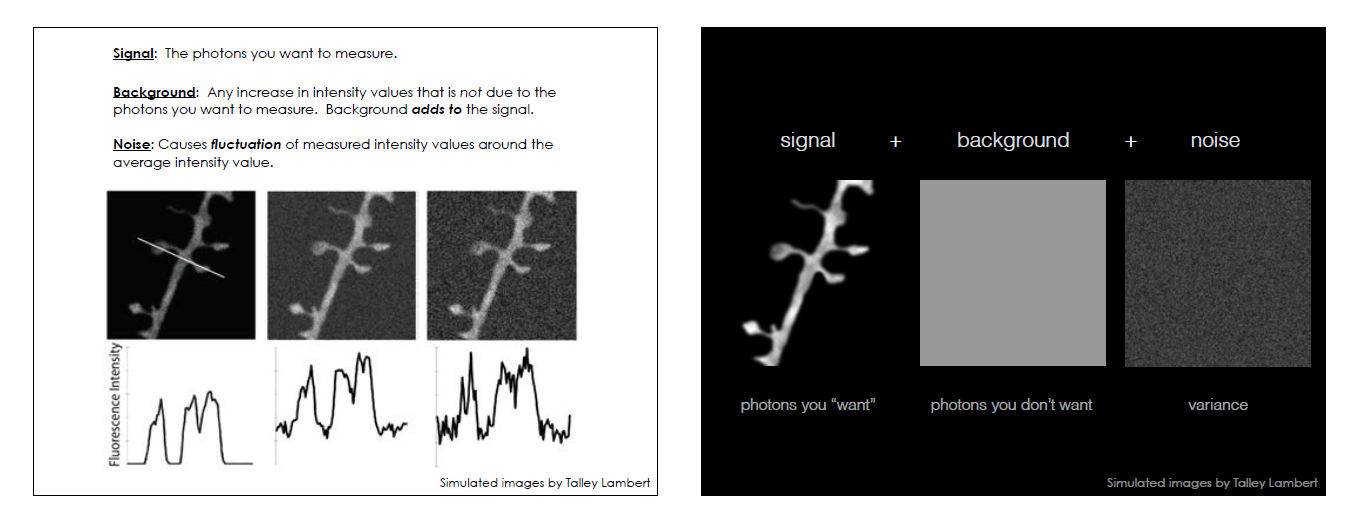

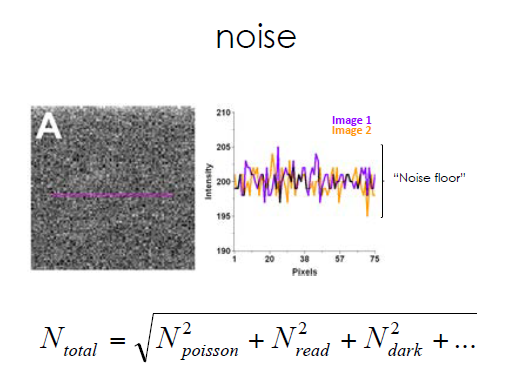

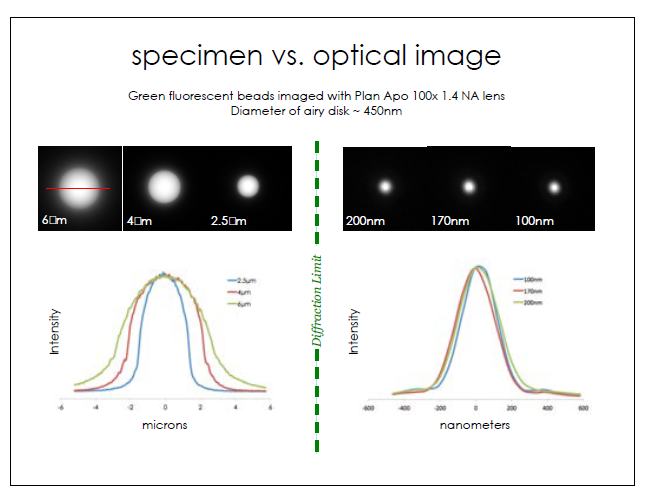